In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic' 
plt.rcParams["font.size"] =50
%matplotlib inline 


from datetime import datetime, timedelta 

#### Weather data 준비

In [3]:
# hourly WEATHER data
w_hr = pd.read_csv("data/weather/hourly.csv",encoding='euc-kr', sep=',')
w_hr2 = w_hr.loc[:,['Time', 'Temp','Humidity', 'WindSpeed']]
w_hr2['Humidity']=w_hr2.loc[:,'Humidity'].fillna(0)
w_hr2.head(2)

,Time,Temp,Humidity,WindSpeed
0,2016.7.20 0:00,25.7,0.0,1.3
1,2016.7.20 1:00,25.6,0.0,1.4


In [4]:
w_hr2['Time'] = pd.to_datetime(w_hr2.Time)
w_hr2 = w_hr2.set_index('Time')
w_hr2.head(2)

,Temp,Humidity,WindSpeed
Time,,,
2016-07-20 00:00:00,25.7,0.0,1.3
2016-07-20 01:00:00,25.6,0.0,1.4


#### 파생변수 만들기

In [20]:
test = pd.read_csv("data/test.csv", index_col=0)
train = pd.read_csv("data/train.csv", index_col=0)

In [21]:
test.index = pd.to_datetime(test.index)
train.index = pd.to_datetime(train.index)

In [22]:
def dateTimeVar(df):
    df1 = pd.DataFrame(df.index)
    df1.index = pd.to_datetime(df1.iloc[:,0])
    df1 = df1.drop(columns=df1.columns)
    # datetime을 사용한 파생변수
    # 연도, 월, 일, 요일, 시간
    df1['Mth']= df1.index.month
    df1['Date']=df1.index.day
    df1['Day']=df1.index.weekday
    df1['hour']=df1.index.hour
    
    # Season 1: 봄 ~ 4: 겨울 
    df1['season'] = df1.Mth.apply(lambda x: 4 if x in [12,1,2] else 
                1 if x in [3,4,5] else 2 if x in [6,7,8]
               else 3)
    # dayClass 1: 월, 2: 화~금, 3: 토, 일 
    # 참조 from 실시간 수요예측 기법 개발 및 온라인 수요예측 방안 연구_KPX 한국전력거래소)
    df1['dayClass'] = df1.Day.apply(lambda x: 1 if x ==0 else 
                2 if x in [1,2,3,4] else 3)
    return df1

In [23]:
TE_time_vars = dateTimeVar(test)
TR_time_vars = dateTimeVar(train)

In [24]:
TE_time_vars.head(1)

,Mth,Date,Day,hour,season,dayClass
Time,,,,,,
2017-07-01,7,1,5,0,2,3


In [25]:
TR_time_vars.head(1)

,Mth,Date,Day,hour,season,dayClass
Time,,,,,,
2016-07-26 11:00:00,7,26,1,11,2,2


## heatmap

In [14]:
selected = pd.read_csv("data/train_all.csv", index_col=0, sep=',')

In [30]:
selected.index = pd.to_datetime(selected.index)

In [31]:
selected.head(2)

,X40,X84,X77,X93,X89,X15,X23,X60,X27,X6,...,X41,X50,X30,X37,X18,X231,X116,X149,X371,X218
Time,,,,,,,,,,,,,,,,,,,,,
2018-02-15 00:00:00,10.592437,0.164,0.561,0.340,1.396,2.284564,2.691859,2.094527,4.322733,4.749095,...,2.371049,6.545218,4.803182,4.499756,2.495460,0.327,0.199,0.261,0.142,0.361
2018-02-15 01:00:00,10.592437,0.161,0.486,0.344,1.394,2.284564,2.691859,2.094527,4.322733,4.749095,...,2.334381,5.984280,4.529291,4.341709,2.500658,0.202,0.168,0.391,0.319,0.241


In [43]:
te_C1 = ['X41', 'X50', 'X30', 'X37', 'X18']
te_C2 = ['X231', 'X116', 'X149', 'X371', 'X218']
tr_C1 = ['X40', 'X84', 'X77', 'X93', 'X89', 'X15','X23' ,'X60' ,'X27', 'X6']
tr_C2 = ['X610' ,'X1362' ,'X476' ,'X237' ,'X1032', 'X1287' ,'X428', 'X768', 'X989','X616']

In [76]:
import random as rd
rd.seed (10)

selected_cols = [rd.sample(te_C1, k=1)[0],rd.sample(te_C2, k=1)[0], 
                 rd.sample(tr_C1, k=1)[0], rd.sample(tr_C2, k=1)[0]]

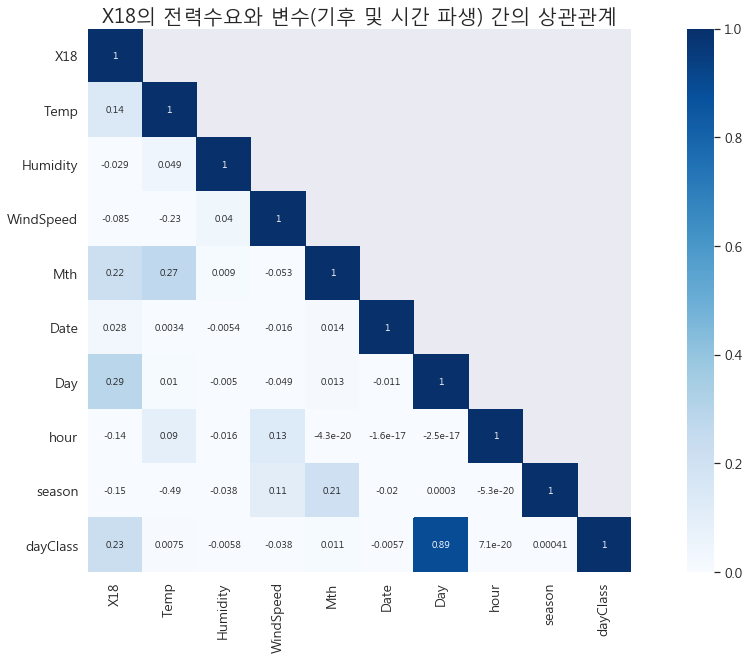

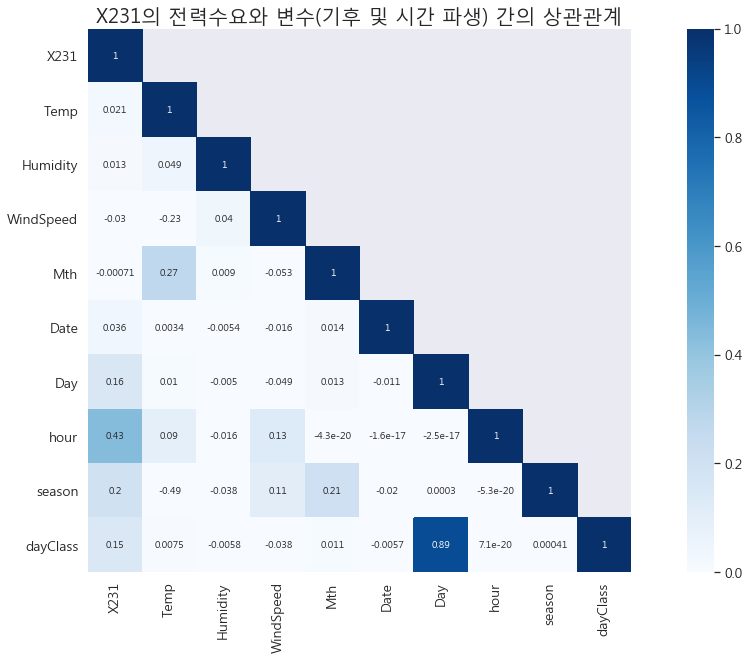

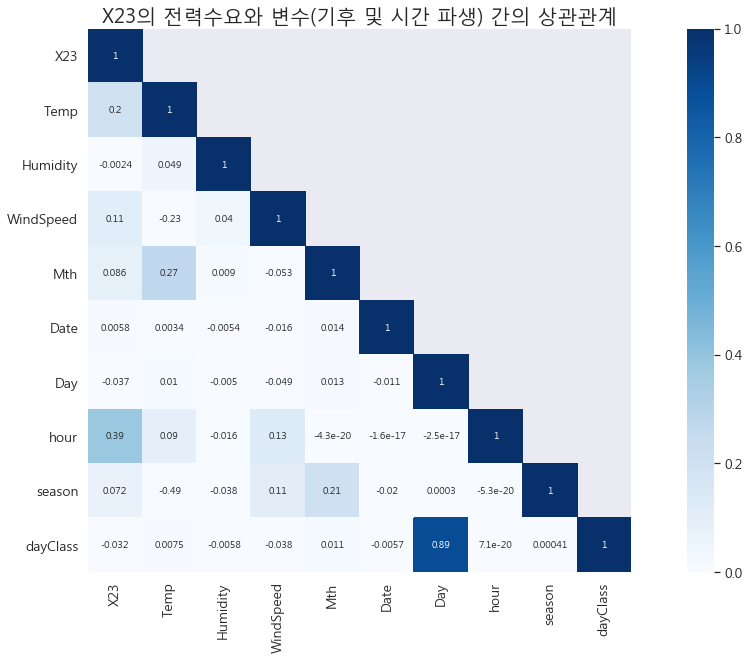

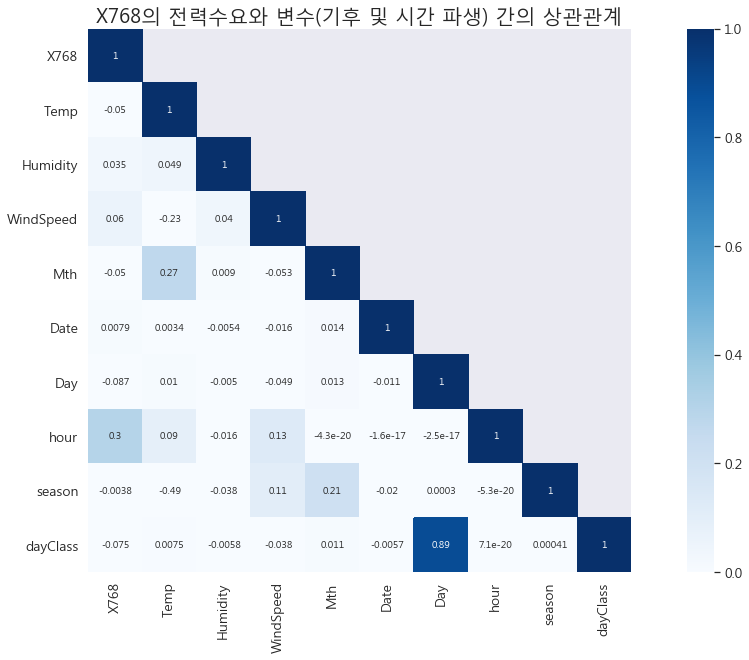

In [85]:
for mID in selected_cols:
    tmp = pd.concat([selected.loc[:, [mID]], w_hr2], axis=1)
    df = pd.concat([tmp, dateTimeVar(tmp)], axis=1)
    
    mask = np.array(df.corr())
    mask[np.tril_indices_from(mask)] = False

    fig,ax= plt.subplots()
    fig.set_size_inches(20,10)

    sns.heatmap(df.corr(), mask=mask, vmax=1, vmin=0, square=True, 
                annot=True, cmap = 'Blues', annot_kws={"size": 10})
    
    plt.title(mID+'의 전력수요와 변수(기후 및 시간 파생) 간의 상관관계', fontsize=20)
    
    plt.show